In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
sns.set_style('darkgrid')

In [2]:
# Loading Data
data = pd.read_csv('SampleSuperstore.csv')
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [3]:
# Structure of Dataset
data.shape

(9994, 13)

In [4]:
# Checking for Null Values
data.isna().sum().to_frame('Null Values')

,Null Values
Ship Mode,0
Segment,0
Country,0
City,0
State,0
Postal Code,0
Region,0
Category,0
Sub-Category,0
Sales,0


In [5]:
# Checking for Duplicates
data.duplicated().sum()

17

In [6]:
# Removing Duplicates
data = data.drop_duplicates()
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [7]:
# Unique values in Country Column
data.Country.unique()

array(['United States'], dtype=object)

In [8]:
# Dropping Unnecessary columns from the Dataset
data = data.drop(columns=['Postal Code', 'Country'], axis=1)
data.head()

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [9]:
# Statistics of Data
data.describe()

,Sales,Quantity,Discount,Profit
count,9977.000000,9977.000000,9977.000000,9977.00000
mean,230.148902,3.790719,0.156278,28.69013
std,623.721409,2.226657,0.206455,234.45784
min,0.444000,1.000000,0.000000,-6599.97800
25%,17.300000,2.000000,0.000000,1.72620
50%,54.816000,3.000000,0.200000,8.67100
75%,209.970000,5.000000,0.200000,29.37200
max,22638.480000,14.000000,0.800000,8399.97600


# Exploratory Data Analysis

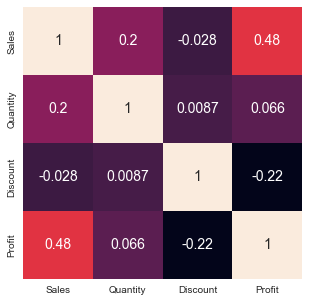

In [10]:
# PLotting Correlation between Variables
plt.figure(figsize=(5,5))
sns.heatmap(data.corr(), annot=True, cbar=False, annot_kws={'size':14})
plt.show()

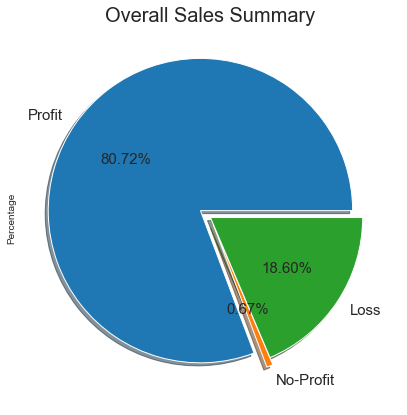

In [11]:
# Plotting Overall Sales Summary
summary = pd.DataFrame({'Profit':data.Quantity[data.Profit > 0].sum(), 
                        'No-Profit':data.Quantity[data.Profit == 0].sum(), 
                        'Loss':data.Quantity[(data.Profit) < 0].sum()},
                       index={'Count'}).T
plt.title('Overall Sales Summary', fontsize=20)
summary.Count.plot.pie(autopct='%1.2f%%',figsize=(7,7), label='Percentage', 
                       textprops = {"fontsize":15}, shadow=True, explode=(0.08,0.05,0))
plt.show()

# Overall Profit Analysis

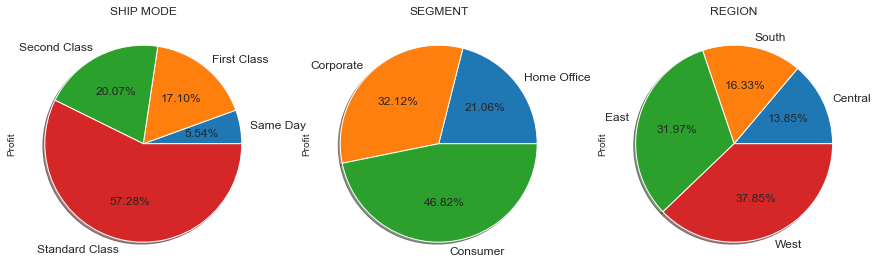

In [12]:
# Plotting Shipmode, Segment, and Region-wise profit
prof_S = pd.DataFrame(data.groupby('Ship Mode').sum()).sort_values('Profit')
prof_G = pd.DataFrame(data.groupby('Segment').sum()).sort_values('Profit')
prof_R = pd.DataFrame(data.groupby('Region').sum()).sort_values('Profit')
fig, ax = plt.subplots(1,3, figsize=(15,6))
ax[0].set_title('SHIP MODE', fontsize=12)
ax[1].set_title('SEGMENT', fontsize=12)
ax[2].set_title('REGION', fontsize=12)
prof_S.Profit.plot.pie(autopct='%1.2f%%', textprops = {"fontsize":12}, shadow=True, ax=ax[0])
prof_G.Profit.plot.pie(autopct='%1.2f%%', textprops = {"fontsize":12}, shadow=True, ax=ax[1])
prof_R.Profit.plot.pie(autopct='%1.2f%%', textprops = {"fontsize":12}, shadow=True, ax=ax[2])
plt.show()

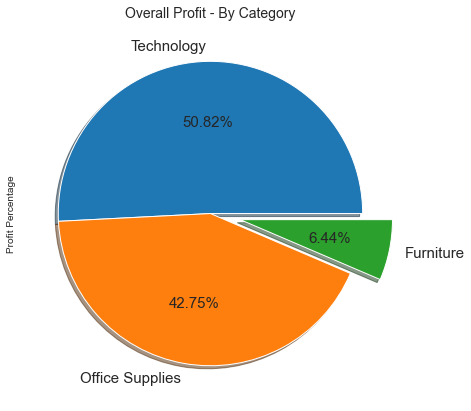

In [13]:
cat = np.round(data.groupby('Category').sum(), decimals=2).sort_values('Profit', ascending=False)
plt.title('Overall Profit - By Category', fontsize=14)
cat.Profit.plot.pie(autopct='%1.2f%%', figsize=(7,7), label='Profit Percentage', 
                    textprops = {"fontsize":15}, explode=(0, 0, 0.2), shadow=True)
plt.show()
